**LI, YI-QUAN(Eric)**

**uni-ID:s08yli**

**github-address: https://github.com/LeeYee2002/Computational-Physics-HW.git**

Problem 1: P = 10000 and X = 1

In [38]:
import numpy as np
import matplotlib.pyplot as plt


##experiments prepare
dimension = 2                   #pair 
n_points_per_experiment = 10000 #number of pair/ P=10000
n_experiments = 1               #number of independent experiment/ X=1
points = np.random.uniform(low=-1.0, high=1.0,size=(dimension, n_points_per_experiment,n_experiments, )) #{[(px1,py1),(px2,py2)...(px10000),(py10000)]}


In [39]:
##experiments result calculation
radius = (points**2).sum(axis=0)  #px^2 + py^2
#print(radius)
inside_the_circle = (radius <= 1) # how many points in the circle
inside_the_square = ((-1.0 <= points[0]) & (points[0] <= 1.0) &(-1.0 <= points[1]) & (points[1] <= 1.0)) #how many points inside the square
pi_by_4 = inside_the_circle.sum(axis=0) / inside_the_square.sum(axis=0) #ratio 
pi = 4 * pi_by_4


In [40]:
##experiment analysis
average = pi.mean()
uncertainty = pi.std()
average = pi.mean()
uncertainty = pi.std()
print(f'pi ={average} ± {uncertainty}')

pi =3.1496 ± 0.0


•**Compute the mean and standard deviation of the π observable inside this single experiment.**
Here the standard deviation is for X = 1, to find the P uncertainty, see the last Problem(1.5)

In [41]:

#
print(f'pi ={average} ± {uncertainty}')
print(f'pi_average = {average}, pi_uncertatinty = {uncertainty}')

pi =3.1496 ± 0.0
pi_average = 3.1496, pi_uncertatinty = 0.0


**Plot a histogram of all the radii**

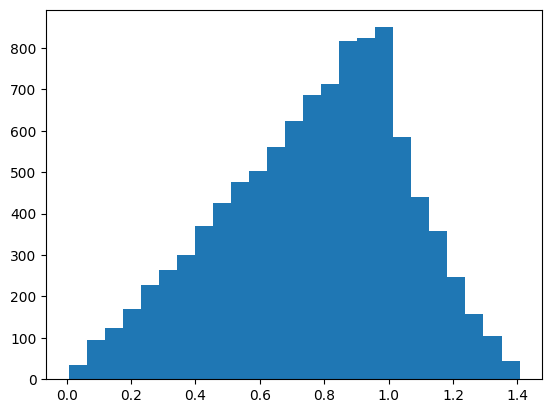

In [42]:

#• Plot a histogram of all the radii 
plt.hist(radius**0.5, bins = 25)
plt.show()


**Plot a histogram of all the squared radii**

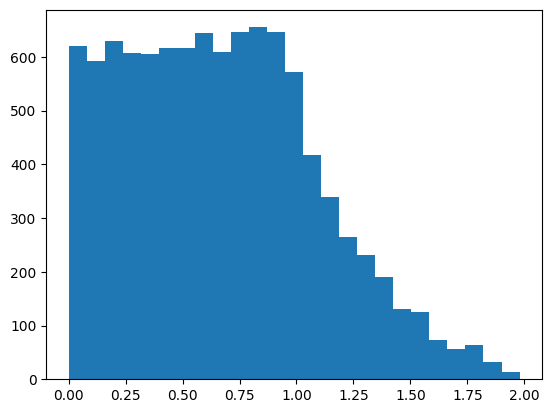

In [43]:
plt.hist(radius, bins = 25)
plt.show()

**Write a few sentences (which may include mathematics) explaining why the histograms have the features they do to the left of 1 and to the right of 1. In particular explain why the behavior differs so dramatically for values less than 1**

For the r**2 histogram, it can be explained from the picture of r. Since any number whose value is less than 1, then their square will be closer to 0.
From the histogram from HW1-1-2, we can find most of value is less than one. Thus, the histogram HW1-1-3 will have more datas that tend to approach to 0.
For the r histogram, we can first to analyze the uniform distrubution.
for 1 D case(10000 elements):

uniform distrubution mean value(it supposed to be 0):

In [44]:
one_D_number_array = np.random.uniform(low=-1.0, high=1.0,size=(1, 10000,1, ))
print("mean value in 1D:",one_D_number_array.mean(axis = 1))      #theoratically approaching to 0

mean value in 1D: [[0.00673384]]


uniform distrubution mean squared value:
theoratically:

mean squared value = $\frac{\int^1_{-1}x^2 dx }{\int^1_{-1} dx} = \frac{1}{3} \approx 0.33$

Here we calculated it discretely get a close result.

In [45]:

print("mean squared in one-D",(one_D_number_array**2).mean(axis = 1)) #approaching to 0.33 
#the meanvalue of all x^2, theoratically we are calculating the "(integration x^2)/(total length)" from -1 to 1
#theoratically the mean value for all x^2 from -1 to +1 is 0.33.


mean squared in one-D [[0.33502502]]


Then we check both 1D x-histogram and x^2 historgram.
For 1-D x historgram:

(array([399., 389., 394., 394., 385., 408., 402., 424., 408., 394., 383.,
        349., 410., 394., 394., 402., 394., 419., 409., 413., 409., 418.,
        384., 428., 397.]),
 array([-0.99984453, -0.91985077, -0.839857  , -0.75986324, -0.67986947,
        -0.5998757 , -0.51988194, -0.43988817, -0.35989441, -0.27990064,
        -0.19990688, -0.11991311, -0.03991934,  0.04007442,  0.12006819,
         0.20006195,  0.28005572,  0.36004948,  0.44004325,  0.52003701,
         0.60003078,  0.68002455,  0.76001831,  0.84001208,  0.92000584,
         0.99999961]),
 <BarContainer object of 25 artists>)

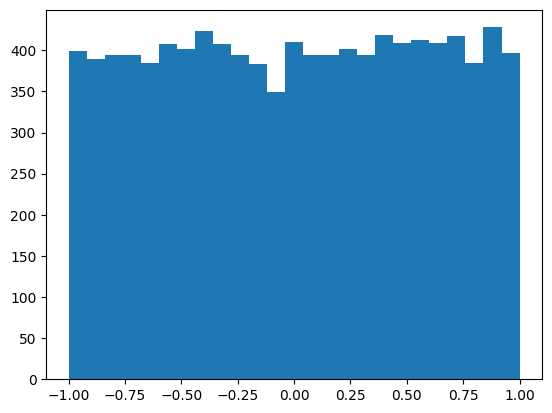

In [46]:
plt.hist((one_D_number_array)[0], bins = 25) #we find most of datas are approaching to left

1D $x^2$ historgram:
We also show the median of in set of $x^2$:

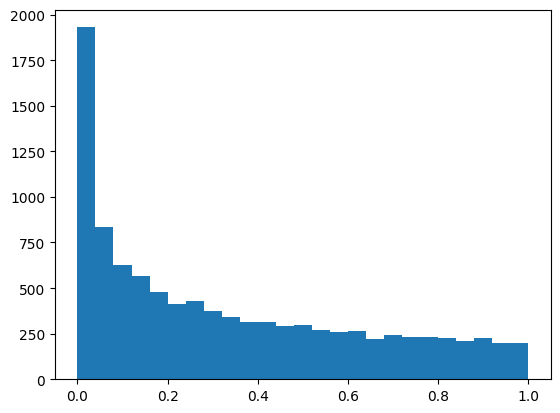

median in 1D [[0.25390916]]


In [47]:
#Check the histogram, most of the datas are in the left side.
plt.hist((one_D_number_array**2)[0], bins = 25) #we find most of datas are approaching to left
plt.show()
print("median in 1D",np.median((one_D_number_array**2),axis = 1)) #my one trial : 0.26089879/

Find median is relatively easy, mapping from $x \rightarrow x^2$ is uniformly continuous. The old median(except 0) is 0.5, so the median in set of $x^2$ is 0.25.

As this statistcal result we will find that most of addition value for x^2+y^2 are high-possibly less than 1
Thus the square root less than 1, the histogram of r leans to left of 1.

**Plot a histogram of the indicator variable 4[x^2+y^2<=1],. Draw a vertical line at the mean of all the samples, and indicate the mean ± standard deviation with vertical lines. Indicate the true, known value of π for comparison.**

**uncertainty** of all sample: **1.6365878650411652**

[[0.27542862]
 [0.82469691]
 [1.11323314]
 ...
 [0.19186813]
 [0.0986225 ]
 [1.02457291]]
er
[[4.]
 [4.]
 [0.]
 ...
 [4.]
 [4.]
 [0.]]
mean value of sample:3.1496, uncertainty of all sample:1.6365878650411652


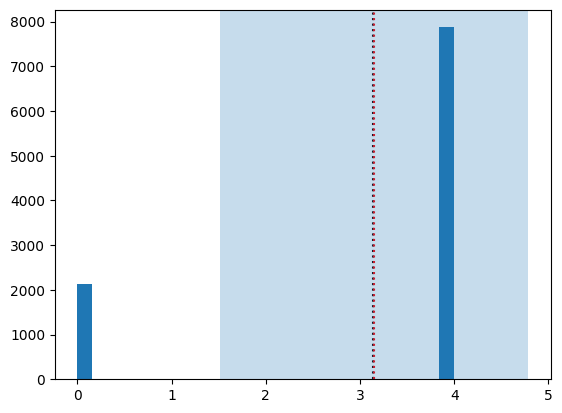

In [48]:
all_sample = radius.copy() 
print(all_sample)
for i in range(len(radius)):
    if all_sample[i] > 1:
        all_sample[i] = 0
    else:
        all_sample[i] = 4
print("er")
print(all_sample)
plt.hist(all_sample, bins=25) #bins: the size of histogram bar
plt.axvline(np.pi, color='black', zorder=1, linestyle=':') #true pi value
plt.axvline(all_sample.mean(), color='red', zorder=1, linestyle=':') #estimate mean pi
plt.axvspan(all_sample.mean()-all_sample.std(), all_sample.mean()+all_sample.std(), alpha=0.25) #range of average
print(f'mean value of sample:{all_sample.mean()}, uncertainty of all sample:{all_sample.std()}')
plt.show()

In the picture, we can see the red-dash line indicate the estimate value of pi; otherwise the black-dash line shows the true value of pi. The blue shadow area is the uncertainty to our estimated result.